## loading data

In [11]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# import matplotlib.style as mplstyle
# mplstyle.use('fast')
%matplotlib qt


def read_binary_file(filename, num_bodies):
    data = np.fromfile(filename, dtype=np.float64)
    positions = data.reshape(-1, num_bodies, 6)
    return positions


# Example usage:
# num_bodies = 20019  # Number of celestial bodies
num_bodies = 20 # Number of celestial bodies
# positions = read_binary_file("simulation_output7.bin", num_bodies)
positions = read_binary_file("simulation_test_joost.bin", num_bodies)

print("Loaded positions:", positions.shape)


class CelestialBody:
    def __init__(self, name, color, pos, trail=False):
        self.name = name
        self.color = color
        self.pos = pos
        self.trail = trail


def loadrockllist(name, num_bodies):
    positions = read_binary_file(name, num_bodies)
    bodies_names = (
        [
            "Saturn",
            "Mimas",
            "Enceladus",
            "Tethys",
            "Dione",
            "Rhea",
            "Titan",
            "Hyperion",
            "Iapetus",
            "Phoebe",
            "Janus",
            "Epimetheus",
            "Helene",
            "Telesto",
            "Calypso",
            "Atlas",
            "Prometheus",
            "Pandora",
            "Pan",
        ]
        + [""] * num_bodies
        + list(str(i) for i in range(num_bodies))
    )
    colors = [
        "yellow",
        "gray",
        "chartreuse",
        "lightblue",
        "orange",
        "brown",
        "blue",
        "pink",
        "red",
        "black",
        "green",
        "purple",
        "cyan",
        "magenta",
        "gold",
        "silver",
        "lime",
        "navy",
        "maroon",
    ] + num_bodies * ["navy"]
    tails = [True] * 19 + [False] * num_bodies
    rocks = [
        CelestialBody(bodies_names[i], colors[i], positions[:, i, :3], tails[i])
        for i in range(num_bodies)
    ]
    for j, i in enumerate(rocks):
        i.vs = positions[:, j, 3:]
    return rocks


rocks = loadrockllist("simulation_output4.bin", num_bodies)


def give_masses(rocks):
    system_saturn = {
        "Saturn": {
            "m": 5.6834 * 10**26,
            "x": np.array(
                [6.006883700671751e-07, -1.742855233578357e-06, 8.251034016569853e-07]
            ),
            "v": [7.350725142771156e-07, 1.594130917219685e-07, -1.564739509731048e-07],
        },
        "Mimas": {
            "m": 3.7493e19,
            "x": np.array([-1.53915986e08, 9.87909749e07, -4.25283160e07]),
            "v": np.array([-8213.72405082, -9786.81819635, 6024.71802554]),
        },
        "Enceladus": {
            "m": 1.08022e20,
            "x": np.array([2.34973807e08, 2.33650386e07, -3.49835459e07]),
            "v": np.array([-2003.46577623, 11098.05673036, -5619.83963382]),
        },
        "Tethys": {
            "m": 6.17449e20,
            "x": np.array([-1.07874797e08, -2.40322483e08, 1.32644393e08]),
            "v": np.array([10506.62745303, -4185.00650995, 976.00850291]),
        },
        "Dione": {
            "m": 1.095452e21,
            "x": np.array([1.19104122e08, 3.11591678e08, -1.74637379e08]),
            "v": np.array([-9486.13424293, 3212.46321187, -761.59768108]),
        },
        "Rhea": {
            "m": 2.306518e21,
            "x": np.array([3.62527319e08, 3.23174433e08, -2.04002024e08]),
            "v": np.array([-6115.4349641, 5416.78672387, -2297.27064105]),
        },
        "Titan": {
            "m": 1.3452e23,
            "x": np.array([-4.10374248e08, 1.05548576e09, -5.03486605e08]),
            "v": np.array([-5201.86391656, -1296.44611543, 1186.65870186]),
        },
        "Hyperion": {
            "m": 5.62e18,
            "x": np.array([-2.90547781e08, 1.45953690e09, -7.05044907e08]),
            "v": np.array([-4427.2850247, -618.2734007, 725.88095033]),
        },
        "Iapetus": {
            "m": 1.805635e21,
            "x": np.array([1.72908290e09, 2.86007194e09, -1.00828662e09]),
            "v": np.array([-2784.73166963, 1818.40790043, 140.90270205]),
        },
        "Phoebe": {
            "m": 8.292e18,
            "x": np.array([1.11413993e10, 9.27192117e09, -1.40177659e09]),
            "v": np.array([794.37369518, -1278.39419858, -99.17939465]) * 0.01,
        },
        "Janus": {
            "m": 1.898e18,
            "x": np.array([-1.47467199e08, 3.23540200e07, -2.21076656e06]),
            "v": np.array([-3039.02728236, -13698.81040288, 7453.28282841]),
        },
        "Epimetheus": {
            "m": 5.264e17,
            "x": np.array([1.31241486e07, -1.34168132e08, 6.90271744e07]),
            "v": np.array([15750.95917288, 675.13703448, -1991.15673445]),
        },
        "Helene": {
            "m": 1.2e17,
            "x": np.array([-2.86094882e08, 2.29003950e08, -9.38039030e07]),
            "v": np.array([-6548.08735398, -6422.39434725, 3985.01716951]),
        },
        "Telesto": {
            "m": 4.1e16,
            "x": np.array([1.77687220e08, -2.17242818e08, 9.09864593e07]),
            "v": np.array([9005.16791214, 5797.20059558, -3757.23464422]),
        },
        "Calypso": {
            "m": 4e16,
            "x": np.array([-2.87722906e08, -3.34172132e07, 5.38878285e07]),
            "v": np.array([2074.1077259, -9997.06490634, 4960.29505002]),
        },
        "Atlas": {
            "m": 7e16,
            "x": np.array([-6.96100555e07, -1.02612372e08, 6.05093369e07]),
            "v": np.array([14263.46118124, -8058.24931227, 2841.39558857]),
        },
        "Prometheus": {
            "m": 1.6e17,
            "x": np.array([-1.38457302e08, -6.39947919e06, 1.67542093e07]),
            "v": np.array([1559.54591466, -14611.82893543, 7502.86454711]),
        },
        "Pandora": {
            "m": 1.4e17,
            "x": np.array([2.91426332e07, 1.21720366e08, -6.67458225e07]),
            "v": np.array([-15953.4766317, 3565.16003664, -319.69838264]),
        },
        "Pan": {
            "m": 4950000000000000.0,
            "x": np.array([-2.13065950e07, -1.16194051e08, 6.29439053e07]),
            "v": np.array([1.66138946e04, -3.06686871e03, -2.59861962e00]),
        },
    }
    for i in rocks:
        if i.name in system_saturn.keys():
            i.mass = system_saturn[i.name]["m"]
        else:
            i.mass = 0
    return rocks


rocks = give_masses(rocks)


Loaded positions: (90135, 20, 6)


ValueError: cannot reshape array of size 1921824 into shape (20,6)

In [2]:
import numpy as np

def write_binary_file_in_chunks(filename, positions, chunk_size=1000):
    with open(filename, 'wb') as f:
        for i in range(0, positions.shape[0], chunk_size):
            chunk = positions[i:i+chunk_size].flatten()
            chunk.tofile(f)

# Example usage:
write_binary_file_in_chunks('recovered_simulation_output7.bin', positions)


In [3]:
pos0,v0=positions[:,0,:3],positions[:,0,3:]

In [4]:
# positions[5000]
for i in range(len(positions)):
    if np.all(positions[i]==positions[0]): print(i)

## making videos

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

# Enable interactive plotting within the Jupyter Notebook in VS Code
# %matplotlib widget

# Assuming positions are already loaded as shown in the previous snippet
# Sample data initialization (Modify based on your actual data setup)
class CelestialBody:
    def __init__(self, name, color, pos,trail=False):
        self.name = name
        self.color = color
        self.pos = pos
        self.trail= trail

def read_binary_file(filename, num_bodies):
    data = np.fromfile(filename, dtype=np.float64)
    positions = data.reshape(-1, num_bodies, 6)
    return positions

# Load the positions array as shown previously
# num_bodies = 1019   # Number of celestial bodies (adjust based on your setup)
num_bodies = 20   # Number of celestial bodies (adjust based on your setup)

# positions = read_binary_file('simulation_output4.bin', num_bodies)
positions = read_binary_file('simulation_test_joost.bin', num_bodies)

# Debugging: Print the shape of the positions array
print("Loaded positions shape:", positions.shape)

bodies_names = ["Saturn", "Mimas", "Enceladus", "Tethys", "Dione", "Rhea", "Titan", "Hyperion", "Iapetus", "Phoebe", "Janus", "Epimetheus", "Helene", "Telesto", "Calypso", "Atlas", "Prometheus", "Pandora", "Pan"]+[""]*num_bodies+list(str(i) for i in range(num_bodies))
colors = ['yellow', 'gray', 'chartreuse', 'lightblue', 'orange', 'brown', 'blue', 'pink', 'red', 'black', 'green', 'purple', 'cyan', 'magenta', 'gold', 'silver', 'lime', 'navy', 'maroon',]+num_bodies*["navy"]
tails= [True]*19+[False]*num_bodies
rocks = [CelestialBody(bodies_names[i], colors[i], positions[:, i,:3],tails[i]) for i in range(num_bodies)]

# Find the index of Saturn
for saturn_index, body in enumerate(rocks):
    if body.name == "Saturn":
        break

n = 5 # Number of farthest moons to filter out
# Set up the plots
figure, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))

xmax, xmin = np.max([np.max(body.pos[:, 0]) for body in rocks]), np.min([np.min(body.pos[:, 0]) for body in rocks])
ymax, ymin = np.max([np.max(body.pos[:, 1]) for body in rocks]), np.min([np.min(body.pos[:, 1]) for body in rocks])

# Debugging: Print the min and max values
print(f"xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}")

# Set limits for the first subplot (global view)
ax.set_xlim(1 * xmin - .1 * abs(xmin), xmax + .1 * abs(xmax))
ax.set_ylim(1 * ymin - .1 * abs(ymin), ymax + .1 * abs(ymax))
ax.set_aspect('equal', adjustable='box')

# Filter out n farthest moons for zoomed-in view
nth_largest_indices = np.argsort([np.min(body.pos[:, 0]**2 + body.pos[:, 1]**2) for body in rocks])[:-n]
rocks2 = [body for i, body in enumerate(rocks) if i in nth_largest_indices]

xmax2, xmin2 = np.max([np.max(body.pos[:,0]) for body in rocks2]), np.min([np.min(body.pos[:,0]) for body in rocks2])
ymax2, ymin2 = np.max([np.max(body.pos[:, 1]) for body in rocks2]), np.min([np.min(body.pos[:, 1]) for body in rocks2])
ax2.set_xlim(xmin2, xmax2)
ax2.set_ylim(ymin2, ymax2)
ax2.set_aspect('equal', adjustable='box')
# Plotting lines for both subplots
lines = {body: ax.plot(body.pos[0, 0], body.pos[0, 1], marker="o", markevery=[-1], label=f"{body.name}", color=body.color)[0] for body in rocks}
zoom_lines = {body: ax2.plot(body.pos[0, 0], body.pos[0, 1], marker="o", markevery=[-1], label=f"{body.name}", color=body.color,markersize=1+4*body.trail+10*(body.name=='Saturn'))[0] for body in rocks2}
handles, labels = ax.get_legend_handles_labels()
figure.legend(handles, labels, loc='upper left')
big_traillength=20 #how far ago into the past trail is plotted for big picture
small_traillength=100 #same but for small picture
small_skips=0
big_skips=19
def update(i):
    for body in rocks:
        # Update the full trajectory plot
        lines[body].set_data(body.pos[max(i-big_traillength*body.trail, 0):i:(big_skips+1), 0], body.pos[max(i-big_traillength*body.trail, 0):i:(big_skips+1), 1])

    for body in rocks2:
        # Update the zoomed-in plot, centered on Saturn
        zoom_lines[body].set_data(
            body.pos[max(i-small_traillength*body.trail-1, 0):i:(small_skips+1), 0] - 0*rocks[saturn_index].pos[max(i-small_traillength*body.trail-1, 0):i:(small_skips+1), 0],
            body.pos[max(i-small_traillength*body.trail-1, 0):i:(small_skips+1), 1] - 0*rocks[saturn_index].pos[max(i-small_traillength*body.trail-1, 0):i:(small_skips+1), 1]
        )
    return lines.values(), zoom_lines.values()

# Animation setup
animation = anim.FuncAnimation(
    figure,
    func=update,
    frames=np.arange(0,positions.shape[0], 1),  # Reduce frame step for smoother animation
    interval=.01,  # Increase interval time to reduce flashing
    # blit=True
)

# Show the animation
plt.show()

Loaded positions shape: (90135, 20, 6)
xmin: -9781352250.271051, xmax: 1187732874.7616537, ymin: -3327599547.8359523, ymax: 320198625.4830531


## estimating shortest distance

In [ ]:
dists=[0]*int((positions.shape[1]**2-positions.shape[1])/2)
index=0
for i in range(positions.shape[1]):
    for j in range(i+1,positions.shape[1]):
        dists[index]=np.sqrt(np.sum((positions[0,i,:3]-positions[0,j,:3])**2))
        index+=1

In [75]:
plt.plot(dists)
# plt.xscale("log")
plt.yscale("log")


In [64]:
np.argmin(np.sqrt(np.sum((positions[:,2,]-positions[:,356,])**2,axis=1))[:])

7417

In [ ]:
G=6.674*10**-11

G*rocks[2].mass/np.sum((positions[7417,2,]-positions[7417,356,])**2)

0.000656298579585196

In [54]:
plt.plot(np.sqrt(np.sum((positions[:,2,]-positions[:,356,])**2,axis=1))[7000:8000])

In [ ]:
#saves a video takes an hour though

writergif = anim.PillowWriter(fps=15)
# animation.save('verstoring.gif',writer=writergif)

In [64]:
#werkt niet
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

# Enable interactive plotting within the Jupyter Notebook in VS Code
# %matplotlib widget

# Sample data initialization (Modify based on your actual data setup)
class CelestialBody:
    def __init__(self, name, color, pos):
        self.name = name
        self.color = color
        self.pos = pos

def read_binary_file(filename, num_bodies):
    data = np.fromfile(filename, dtype=np.float64)
    positions = data.reshape(-1, num_bodies, 3)
    return positions

# Load the positions array as shown previously
num_bodies = 19  # Adjusted to the number of bodies provided in names and colors
positions = read_binary_file('positions5.bin', num_bodies)

bodies_names = ["Saturn", "Mimas", "Enceladus", "Tethys", "Dione", "Rhea", "Titan", "Hyperion", "Iapetus", "Phoebe", "Janus", "Epimetheus", "Helene", "Telesto", "Calypso", "Atlas", "Prometheus", "Pandora", "Pan"]
colors = ['aquamarine', 'gray', 'chartreuse', 'lightblue', 'orange', 'brown', 'blue', 'pink', 'red', 'black', 'green', 'purple', 'cyan', 'magenta', 'gold', 'silver', 'lime', 'navy', 'maroon']

rocks = [CelestialBody(bodies_names[i], colors[i], positions[:, i]) for i in range(num_bodies)]

# Find the index of Saturn
for saturn_index, body in enumerate(rocks):
    if body.name == "Saturn":
        break

n = 5  # Number of farthest moons to filter out

# Debugging: Print the position data of the celestial bodies to ensure correctness
for body in rocks:
    print(f"{body.name} initial position: {body.pos[0]}")

# Set up the plots
figure, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))

xmax, xmin = np.max([np.max(body.pos[:, 0]) for body in rocks]), np.min([np.min(body.pos[:, 0]) for body in rocks])
ymax, ymin = np.max([np.max(body.pos[:, 1]) for body in rocks]), np.min([np.min(body.pos[:, 1]) for body in rocks])

# Debugging: Print the calculated min and max values
print(f"xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}")

# Set limits for the first subplot (global view)
ax.set_xlim(xmin - .1 * abs(xmin), xmax + .1 * abs(xmax))
ax.set_ylim(ymin - .1 * abs(ymin), ymax + .1 * abs(ymax))

# Filter out n farthest moons for zoomed-in view
nth_largest_indices = np.argsort([np.max(body.pos[:, 0]**2 + body.pos[:, 1]**2) for body in rocks])[:-n]
rocks2 = [body for i, body in enumerate(rocks) if i in nth_largest_indices]

xmax2, xmin2 = np.max([np.max(body.pos[:, 0]) for body in rocks2]), np.min([np.min(body.pos[:, 0]) for body in rocks2])
ymax2, ymin2 = np.max([np.max(body.pos[:, 1]) for body in rocks2]), np.min([np.min(body.pos[:, 1]) for body in rocks2])
ax2.set_xlim(xmin2 - .1 * abs(xmin2), xmax2 + .1 * abs(xmax2))
ax2.set_ylim(ymin2 - .1 * abs(ymin2), ymax2 + .1 * abs(ymax2))

# Plotting lines for both subplots
lines = {body: ax.plot(body.pos[0, 0], body.pos[0, 1], marker="o", markevery=[-1], label=f"{body.name}", color=body.color)[0] for body in rocks}
zoom_lines = {body: ax2.plot(body.pos[0, 0], body.pos[0, 1], marker="o", markevery=[-1], label=f"{body.name}", color=body.color)[0] for body in rocks2}

def update(i):
    for body in rocks:
        # Update the full trajectory plot
        lines[body].set_xdata(body.pos[:i, 0])
        lines[body].set_ydata(body.pos[:i, 1])

    for body in rocks2:
        # Update the zoomed-in plot, centered on Saturn
        zoom_lines[body].set_xdata(body.pos[max(i-1000, 0):i, 0] - rocks[saturn_index].pos[max(i-1000, 0):i, 0])
        zoom_lines[body].set_ydata(body.pos[max(i-1000, 0):i, 1] - rocks[saturn_index].pos[max(i-1000, 0):i, 1])

# Animation setup
animation = anim.FuncAnimation(
    figure,
    func=update,
    frames=np.arange(0, positions.shape[0], 1),
    interval=1
)

# Ensure that the animation object persists
animation  # Display the animation

ax.legend(loc="upper right")
ax2.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'positions5.bin'

## finding outliers and doing fft

uses 'simulation_output4.bin'

In [102]:
plt.plot(positions[:,356,2])
positions[0]

array([[-2.69742665e-01,  9.75117302e-01, -4.77476290e-01,
        -9.04591027e-04,  3.24986476e-03, -1.59084101e-03],
       [-1.58685481e+08,  9.28169984e+07, -3.88696247e+07,
        -7.67695649e+03, -1.01158400e+04,  6.16449312e+03],
       [ 2.33653776e+08,  3.00121450e+07, -3.83378893e+07,
        -2.39562409e+03,  1.10533917e+04, -5.55848370e+03],
       ...,
       [ 1.76630976e+08, -1.21992827e+08, -3.30626084e-01,
         7.55723050e+03,  1.09403064e+04, -1.11028075e-03],
       [-1.37029091e+08,  1.38654820e+08, -7.88270120e-01,
        -9.91731136e+03, -9.80098299e+03, -2.61474165e-03],
       [ 3.07392401e+07, -1.44381222e+08, -2.49792234e-01,
         1.56866595e+04,  3.34418474e+03, -8.43127729e-04]])

In [5]:
# plt.plot(G*rocks[2].mass/np.sum((rocks[2].pos-rocks[-1].pos)[:]**2,axis=1))
G*rocks[2].mass/np.sum((rocks[2].pos-rocks[-1].pos)[7417]**2)

plt.plot(rocks[-1].pos[:,2])
# plt.savefig("allerotsen_behalveverstoorde")

NameError: name 'G' is not defined

In [ ]:
T = 600
N=len(positions)
start=0
zoomin=1
x=np.arange(0,N*T,T)
y = positions[:,200,2]-np.linspace(positions[0,200,2],positions[-1,200,2],len(positions))
y=y-np.average(y)
# y=np.sin(10**-5*2*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
plt.xlabel("frequency (Hz)")
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
ax1.plot(x,y)
f1=10**-5 #komt uit fft
f2=6.66e-7 #2e fft piek
f3= 1.66650002e-07
ax2.plot(x,-1*np.sin(f3*2*np.pi*x)-np.sin(f2*2*np.pi*x)+.2*np.sin(f1*2*np.pi*x))
ax3.plot(fftfreq(N,T)[start:N//2],2.0/N*np.abs(fft(y))[start:N//2])
ax3.set_xlabel("freqency (Hz)")

Text(0.5, 0, 'freqency (Hz)')

Text(0.5, 0, 'freqency (Hz)')

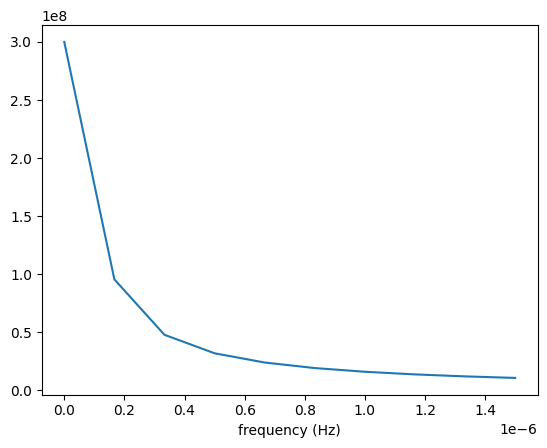

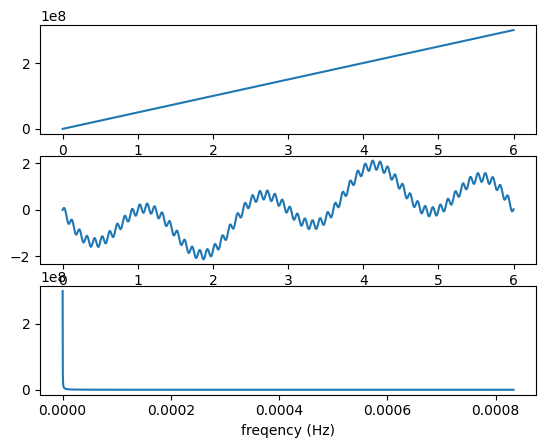

In [ ]:
T = 600
N=len(positions)
start=0
zoomin=500
x=np.arange(0,N*T,T)
y = positions[:,20,2]-np.linspace(positions[0,20,2],positions[-1,20,2],len(positions))
y=y-np.average(y)
y=50*x
yf = fft(y)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
plt.xlabel("frequency (Hz)")
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
ax1.plot(x,y)
f1=10**-5 #komt uit fft
f2=6.66e-7 #2e fft piek
f3= 1.66650002e-07
ax2.plot(x,-1*np.sin(f3*2*np.pi*x)-np.sin(f2*2*np.pi*x)+.2*np.sin(f1*2*np.pi*x))
ax3.plot(fftfreq(N,T)[start:N//2],2.0/N*np.abs(fft(y))[start:N//2])
ax3.set_xlabel("freqency (Hz)")

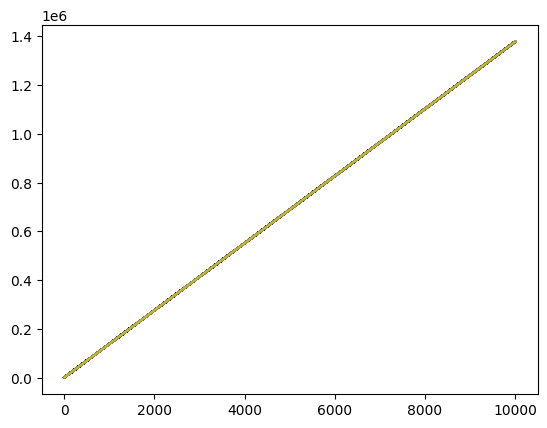

In [ ]:
plt.plot(np.average(np.concatenate((positions[:,19:356,2],positions[:,357:,2]),axis=1),axis=0)*2/len(positions)*np.cumsum(np.ones((10001,999)),axis=0))

In [7]:
plt.plot(np.concatenate((positions[:,19:356,2],positions[:,357:,2]),axis=1))#-np.average(np.concatenate((positions[:,19:356,2],positions[:,357:,2]),axis=1),axis=0)*2/len(positions)*np.cumsum(np.ones((10001,999)),axis=0))
np.average(np.concatenate((positions[:,19:356,2],positions[:,357:,2]),axis=1)-np.average(np.concatenate((positions[:,19:356,2],positions[:,357:,2]),axis=1),axis=0)*2/len(positions)*np.cumsum(np.ones((10001,999)),axis=0),axis=0)
# plt.savefig("allerotsen_behalveverstoorde")

array([-68.90324558, -68.92843224, -68.8854629 , -68.91099916,
       -68.92824862, -68.90155198, -68.9007761 , -68.89110043,
       -68.90366567, -68.900939  , -68.90190862, -68.88998831,
       -68.90743416, -68.90407119, -68.91950313, -68.90613804,
       -68.88885157, -68.91464823, -68.88921365, -68.89782291,
       -68.90837222, -68.89707401, -68.89634332, -68.91164887,
       -68.90496587, -68.88460237, -68.91267865, -68.91100066,
       -68.89541438, -68.90313387, -68.90881457, -68.90037107,
       -68.88437942, -68.91027099, -68.89415545, -68.89659755,
       -68.87228212, -68.88569294, -68.90412095, -68.8921083 ,
       -68.92458436, -68.91450706, -68.88966516, -68.8915983 ,
       -68.90037102, -68.89829703, -68.89066949, -68.90616293,
       -68.90977652, -68.89482906, -68.90543668, -68.91139366,
       -68.89568801, -68.90743343, -68.90542113, -68.90637137,
       -68.89751555, -68.95003833, -68.89818717, -68.9063165 ,
       -68.89376168, -68.9037367 , -68.90467911, -68.90

In [ ]:
rocks3 = [CelestialBody(bodies_names[i], colors[i], positions[:, i,:3],tails[i]) for i in range(num_bodies)]
rocks3=rocks3[19:356]+rocks3[357:]

In [ ]:
# plt.plot(rocks[-1].pos[:7000,2])
id=356
np.average(rocks[2].vs[:7000,2]*7000*600)
# plt.plot(rocks[2].pos[0,2]+(np.cumsum(rocks[2].vs[:7000,2])-rocks[2].vs[:7000,2]/2)*600-rocks[2].pos[:7000,2])
plt.plot(np.cumsum(rocks[-1].vs[:7000,2])*600-rocks[-1].pos[1:7001,2])

In [9]:
rocks[9].pos

array([[ 1.11418759e+10,  9.27115411e+09, -1.40183609e+09],
       [ 1.11423524e+10,  9.27038701e+09, -1.40189559e+09],
       [ 1.11428290e+10,  9.26961988e+09, -1.40195509e+09],
       ...,
       [ 1.28981415e+10,  7.32924673e+07, -1.61856972e+09],
       [ 1.28979640e+10,  7.22862888e+07, -1.61854703e+09],
       [ 1.28979640e+10,  7.22862888e+07, -1.61854703e+09]])

In [ ]:
rocks[:]+[rocks[-1]]

## kernel density analysis

In [10]:
from sklearn.neighbors import KernelDensity
# kde = KernelDensity(kernel='gaussian', bandwidth=1.5).fit(positions[-1,19:,:2])

In [11]:
num_bodies=10019
positions = read_binary_file('simulation_output4_HAHHAHAHAHAHAHAHAAHHA.bin', num_bodies)

In [57]:
plt.plot(positions[:,10006,0])
plt.ylim(-1e12,1e12)

(-1000000000000.0, 1000000000000.0)

In [53]:
np.nonzero(np.any(positions[:,:,0]>1e11,axis=0))[0]

array([   19,    20,    21, ..., 10016, 10017, 10018], dtype=int64)

In [14]:
positions=positions[:,np.nonzero(np.any(positions[:,:,0]>1e11,axis=0)==0)[0],:]

In [15]:
r=np.sqrt(np.sum(positions[-1,19:,:3]**2,axis=1))
theta=np.arctan2(positions[-1,19:,0],positions[-1,19:,1])

In [16]:
X_plot = np.linspace(min(r), max(r), 1000)[:, np.newaxis] 
# Creating a figure
samples=5
times=np.linspace(0,len(positions)-1,samples,dtype=int)
fig, axes = plt.subplots(samples)
# Plotting the true density 
# Calculating the density using the gaussian kernel with bandwidth 0.5 
for time,ax in zip(times,axes):
    r=np.sqrt(np.sum(positions[time,19:,:3]**2,axis=1))
    # r=np.random.random(1000)*6e7+1e8
    X =r[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=1000000).fit(X) 

    # Calculating the log of the probability density function 
    log_dens = kde.score_samples(X_plot) 

    # Plotting the density curve 
    ax.plot( 
        X_plot[:,0], 
        np.exp(log_dens),
        linestyle="-"
    ) 
  
# Set the title, x and y labels of the plot 
axes[0].set_title("Gaussian Kernel Density") 
axes[0].legend(loc='upper right') 
  
# Display the plot 

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [17]:
for i in zip(['yellow', 'gray', 'chartreuse', 'lightblue', 'orange', 'brown', 'blue', 'pink', 'red', 'black', 'green', 'purple', 'cyan', 'magenta', 'gold', 'silver', 'lime', 'navy', 'maroon',],["Saturn", "Mimas", "Enceladus", "Tethys", "Dione", "Rhea", "Titan", "Hyperion", "Iapetus", "Phoebe", "Janus", "Epimetheus", "Helene", "Telesto", "Calypso", "Atlas", "Prometheus", "Pandora", "Pan"],range(200)):
    print(i)


('yellow', 'Saturn', 0)
('gray', 'Mimas', 1)
('chartreuse', 'Enceladus', 2)
('lightblue', 'Tethys', 3)
('orange', 'Dione', 4)
('brown', 'Rhea', 5)
('blue', 'Titan', 6)
('pink', 'Hyperion', 7)
('red', 'Iapetus', 8)
('black', 'Phoebe', 9)
('green', 'Janus', 10)
('purple', 'Epimetheus', 11)
('cyan', 'Helene', 12)
('magenta', 'Telesto', 13)
('gold', 'Calypso', 14)
('silver', 'Atlas', 15)
('lime', 'Prometheus', 16)
('navy', 'Pandora', 17)
('maroon', 'Pan', 18)


In [18]:
# r=np.random.random(1000)*6e7+1e8
X_plot = np.linspace(min(r), max(r), 1000)[:, np.newaxis] 
# Creating a figure
samples=1
times=np.linspace(0,len(positions)-1,samples,dtype=int)
fig, ax = plt.subplots(samples)
# Plotting the true density 
# Calculating the density using the gaussian kernel with bandwidth 0.5 
r=np.sqrt(np.sum(positions[-1,19:,:3]**2,axis=1))
X =r[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=3000000).fit(X) 

# Calculating the log of the probability density function 
log_dens = kde.score_samples(X_plot) 
# Plotting the density curve 
ax.plot( 
    X_plot[:,0], 
    np.exp(log_dens),
    linestyle="-"
) 
# Set the title, x and y labels of the plot 
axes[0].set_title("Gaussian Kernel Density") 
ax.legend(loc='upper right') 
  
# Display the plot 

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [23]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min()-1:x.max()+1:xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)
import numpy as np
import matplotlib.pyplot as plt
indexes=[1,10,11,15,17,18,16]
labels=["mimas","Janus","Epimetheus","Atlas","Pandora","Pan","Prometheus","Enceladus"]
colors=['orange',"green", 'purple', 'silver', 'navy', 'maroon', 'lime', 'chartreuse']
x, y =positions[0,19:,0],positions[0,19:,1]
for lab,i,c in zip(labels,indexes,colors):
    plt.plot(positions[-20:,i,0],positions[-20:,i,1],label=lab,color=c)
xx, yy, zz = kde2D(x, y, 18000000.0)


plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white')
plt.xlim(np.min(xx),np.max(xx))
plt.ylim(np.min(yy),np.max(yy))

plt.axis('square')
plt.plot(positions[-20:,2,0],positions[-20:,2,1],label="Enceladus",color='chartreuse')
plt.legend()

C:\Users\kdvan\AppData\Local\Temp\ipykernel_15208\107237755.py:32: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(np.min(xx),np.max(xx))


In [24]:
fig,(ax1,ax2)=plt.subplots(2)
thet=np.linspace(0,np.pi*16,1000)
x,y=np.cos(np.linspace(0,2*np.pi)),np.sin(np.linspace(0,2*np.pi))
r=thet
theta=thet%(2*np.pi)
# r=np.sqrt(x**2+y**2)
# theta=np.arctan2(y,x)
xx, yy, zz = kde2D(r, theta, .5)
ax1.pcolormesh(xx, yy, zz)
xx, yy, zz = kde2D(r, theta, .5)
ax2.set_xscale("log")

ax2.pcolormesh(xx, yy, zz)


In [21]:
import scipy.fft
FS = scipy.fft.fftn(zz)
plt.imshow(np.log(np.abs(scipy.fft.fftshift(FS))**2))

C:\Users\kdvan\AppData\Local\Temp\ipykernel_15208\781055018.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(np.log(np.abs(scipy.fft.fftshift(FS))**2))


In [27]:
r=np.sqrt(np.sum(positions[-1,19:,:3]**2,axis=1))
theta=np.arctan2(positions[-1,19:,0],positions[-1,19:,1])
from sklearn.neighbors import KernelDensity
fig,(ax1,ax2)=plt.subplots(2)
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)
import numpy as np
import matplotlib.pyplot as plt
x, y =r,theta
indexes=[1,2,10,11,15,16,17,18]
labels=["mimas","Enceladus","Janus","Epimetheus","Atlas","Prometheus","Pandora","Pan"]
colors=['orange', 'violet',"gold", 'purple', 'silver', 'lime', 'navy', 'maroon']
xx, yy, zz = kde2D(x, theta, 3000000,xbins=100j,ybins=100j)
plt.xlim(min(r),max(r))
ax1.pcolormesh(xx, yy, zz)
xx, yy, zz = kde2D(np.log(x), theta/10, .01,xbins=100j,ybins=100j)
# _,_,zz2=kde2D(np.log(x), theta/1000, .01,xbins=100j,ybins=100j)
ax2.set_xlim(np.log(min(r)),np.log(max(r)))
ax2.set_ylim(np.pi/10,-np.pi/10)
ax2.pcolormesh(xx, yy, zz)
for lab,i,c in zip(labels,indexes,colors):
    ax1.vlines(np.average(np.sqrt(np.sum(positions[:,i,:3]**2,axis=1))),-np.pi,np.pi,label=lab,colors=c)
# plt.scatter(x, y, s=2, facecolor='white')
# plt.hlines(np.pi*np.ones(5),np.array([66_900,74_658,91_975,122_340,180_000])*1000,np.array([74_510,91_975,117_507,136_780,480_000])*1000,colors="red")
# text = plt.text(2.2e8, 1.1*np.pi, 
# 'E-ring', horizontalalignment='center', wrap=True) 
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [83]:
2*np.pi/(np.log(min(r))-np.log(max(r)))

-9.69880604228018

In [ ]:
np.fft2()

In [63]:
plt.figure()
plt.plot(np.exp(np.linspace(1,10**2)),np.linspace(1,10**3))
plt.xscale("log")
plt.show()

In [ ]:
for lab,i,color in zip(labels,indexes,["r","b","g","yellow","magenta","purple","black"]):
    plt.vlines(np.average(np.sqrt(np.sum(positions[:,i,:3]**2,axis=1))),-np.pi,np.pi,label=lab,colors=color)

## some data manipulation, mostly adding masses

In [4]:
syst_masses_hor={"Saturn":5.6834*10**26,
 'Mimas': 3.75e+19,
 'Enceladus': 1.0805e+20,
 'Tethys': 6.176e+20,
 'Dione': 1.09572e+21,
 'Rhea': 2.309e+21,
 'Titan': 1.3455299999999999e+23,
 'Hyperion': 1.08e+19,
 'Iapetus': 1.8059e+21,
 'Phoebe': 8.289e+18,
 'Janus': 1.9800000000000003e+18,
 'Epimetheus': 5.5e+17,
 'Helene': 2.5469999999999996e+22,
 'Telesto': 7.194e+21,
 'Calypso': 3.597e+21,
 'Atlas': np.nan,
 'Prometheus': 1.4e+17,
 'Pandora': 1.3e+17,
 'Pan': np.nan}
for i in rocks:
    try: i.mass=syst_masses_hor[i.name]
    except KeyError: print(i.name, "not in there")

 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not in there
 not i

In [6]:
for i in rocks: plt.plot(i.pos[:,0],label=i.name)
plt.legend("center right")

# checking that centre of mass, momentum, and energy are conserved

In [3]:
rocks=loadrockllist('simulation_output4_HAHHAHAHAHAHAHAHAAHHA.bin',10019)
rocks=give_masses(rocks)
num_bodies=10019
positions = read_binary_file('simulation_output4_HAHHAHAHAHAHAHAHAAHHA.bin', num_bodies)

In [12]:
if np.all( positions[-1]==positions[-2]):
    for i in rocks:
        i.pos=i.pos[:-1]
        i.vs=i.vs[:-1]
    positions=positions[:-1]

In [6]:
totx=np.sum([i.mass*i.pos for i in rocks],axis=0)/np.sum([i.mass for i in rocks])
totv=np.sum([i.mass*i.vs for i in rocks],axis=0)/np.sum([i.mass for i in rocks])
G=6.674*10**-11
potential=np.zeros(len(rocks[0].pos))
for j,p1 in enumerate(rocks[:20]):
    for p2 in rocks[j+1:20]:
        if p1==p2: continue
        potential+=-2*G*p1.mass*p2.mass/np.sqrt(np.sum((p1.pos-p2.pos)**2,axis=1))
total=(np.sum([it.mass*np.sum(it.vs[0]**2) for it in rocks]))+potential[0]
plt.plot(((np.sum([it.mass*np.sum(it.vs**2,axis=1) for it in rocks],axis=0)+potential)/total-1))
np.average((np.sum([it.mass*np.sum(it.vs**2,axis=1) for it in rocks],axis=0)+potential)/total-1)

-3.081081496030753e-05

In [14]:
figur=plt.figure()
gi = figur.add_gridspec(3, hspace=0)
(ax1,ax2,ax3)=gi.subplots(sharex=True)
ax1.plot(10/5/24*np.arange(0,len(totx),1),totv*60*60*24,label=["x","y","z"])
ax1.set_ylabel("V (m/d)")
ax1.legend()
vgem=np.average(totv,axis=0)
ax2.plot(10/5/24*np.arange(0,len(totx),1),totx-600*12*np.cumsum(np.concatenate((np.zeros((1,3)),totv[:-1]),axis=0),axis=0),label=["x","y","z"])
ax2.set_ylabel("pos (m)")
ax3.plot(10/5/24*np.arange(0,len(totx),1),((np.sum([it.mass*np.sum(it.vs**2,axis=1) for it in rocks[:20]],axis=0)+potential)/total-1)*1e6)
ax3.set_ylabel("energy error (ppm)")
figur.supxlabel("time (days)")
# figur.savefig("conserved quantities.jpeg")

Text(0.5, 0.01, 'time (days)')

### inclines

In [4]:
saturn=rocks[0]

In [ ]:
#ploto inclines
plt.figure()
# plt.ylim(-1e-2,+1e-2)
for boss in rocks[1:7]+rocks[10:19]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(10/5/24*np.arange(0,len(totx),1),(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1),color=boss.color,label=boss.name)
plt.legend()
plt.xlabel("time (days)")
plt.ylabel("relative deviation")
plt.show()

C:\Users\kdvan\AppData\Local\Temp\ipykernel_27248\3704378924.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10/5/24*np.arange(0,len(totx),1),(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1),color=boss.color,label=boss.name)
C:\Users\kdvan\AppData\Local\Temp\ipykernel_27248\3704378924.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(10/5/24*np.arange(0,len(totx),1),(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1),color=boss.color,label=boss.name)


In [ ]:
#check incline of 1 moon specifically, 16 being prometeus

boss=rocks[16]
h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
zoomlist=list(range(465,470))
# plt.plot(10/5/24*np.arange(0,len(totx),1),h[:,2])
plt.plot(np.arange(0,len(totx),1)[zoomlist],((h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[zoomlist]-1))
# plt.ylim(1,1+10e-9)
# plt.xlim(39,40)

In [ ]:
#plots acceleration of prometeus due to all other moons seperately
prometeus=boss
for i in rocks:
    if i==prometeus: continue
    plt.plot(i.mass/((prometeus.pos[:,0]-i.pos[:,0])**2+(prometeus.pos[:,1]-i.pos[:,1])**2+(prometeus.pos[:,2]-i.pos[:,2])**2),label=i.name)
plt.legend()

: 

In [ ]:
#acceleration on prometeus due to mimas
prometeus=rocks[16]
i=rocks[1]
zoomlist=list(range(465,470))
plt.figure()
plt.plot((i.mass/((prometeus.pos[:,0]-i.pos[:,0])**2+(prometeus.pos[:,1]-i.pos[:,1])**2+(prometeus.pos[:,2]-i.pos[:,2])**2)),label=i.name)
# plt.xlim(465,470)
plt.show()
np.argmax((i.mass/((prometeus.pos[:,0]-i.pos[:,0])**2+(prometeus.pos[:,1]-i.pos[:,1])**2+(prometeus.pos[:,2]-i.pos[:,2])**2))[300:700])

In [7]:
plt.plot(h[:,2])

In [97]:
plt.plot(boss.vs[:,1])

In [37]:
plt.plot(boss.vs)

In [ ]:
#not sure what this was for seems the same as couple cell blocks earlier
plt.figure()
# plt.ylim(-1e-2,+1e-2)
for boss in rocks[1:7]+rocks[10:18]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(10/5/24*np.arange(0,len(totx),1),np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1,color=boss.color,label=boss.name)
plt.legend()
plt.show()

In [8]:
plt.figure()
indexes=list(range(1,7))+list(range(1,7))
[8,9]
# plt.ylim(-1e-2,+1e-2)
for boss in rocks[1:8]+rocks[10:19]:
    plt.figure()
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(10/5/24*np.arange(0,len(totx),1),np.degrees(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))),color=boss.color,label=boss.name)
    plt.title(boss.name)
    plt.show()
plt.legend()
plt.show()
# plt.savefig("inclines_without_IaorPh.jpeg")

In [ ]:
plt.figure()
# plt.ylim(-1e-2,+1e-2)
for boss in rocks[6:10]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(10/5/24*np.arange(0,len(totx),1),np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1,color=boss.color,label=boss.name)
plt.legend()
plt.show()
# plt.savefig("interesting_inclines.jpeg")

In [26]:
lst=[]
for astroid in rocks[1:]:
    h=np.cross(astroid.pos-saturn.pos,astroid.vs-saturn.vs,axis=1)
    incline=np.degrees(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2)))
    # print(f"{astroid.name}: {np.average(incline)}\pm{np.std(incline)}")
    lst+=[(np.average(incline),np.std(incline))]

In [28]:
astroid=rocks[1006]
# plt.plot(np.cross(astroid.pos-saturn.pos,astroid.vs-saturn.vs,axis=1))
plt.plot(np.sqrt(np.sum(astroid.pos[:,2:3]**2,axis=1))[200:])

In [568]:
print("\\begin{table}[]\n\\begin{tabular}{lll}\nmoon & i & u(i)",end="")
for index,(avg,st) in enumerate(lst[:18],start=1):
    print("\\\\")
    print(F"{rocks[index].name} & {avg} & {st}",end="")
print("\n\\end{tabular}\n\\end{table}")

\begin{table}[]
\begin{tabular}{lll}
moon & i & u(i)\\
Mimas & 1.5725946588212043 & 3.653894083330977e-05\\
Enceladus & 0.007169854831930439 & 0.00044211403409506733\\
Tethys & 1.0933132957075455 & 6.264116627841775e-05\\
Dione & 0.027007319002848838 & 5.4957858102368387e-05\\
Rhea & 0.30927254987519964 & 0.00017437518297574008\\
Titan & 0.40113431753054773 & 4.1401321151688815e-06\\
Hyperion & 1.0106541409509793 & 0.0005877905067411907\\
Iapetus & 15.77251846470998 & 0.0030750122740827415\\
Phoebe & 152.4350154380062 & 0.0144597646809034\\
Janus & 0.1651548268638156 & 0.0001730826649642214\\
Epimetheus & 0.35311380577481355 & 0.0014324899867855533\\
Helene & 0.21550905989433378 & 0.00019773267906252588\\
Telesto & 1.1815279639739256 & 4.021881763750452e-05\\
Calypso & 1.5001466717035106 & 9.636515790871723e-05\\
Atlas & 0.002841378154253784 & 8.152230610543998e-05\\
Prometheus & 0.008593789208114736 & 0.0004463939531832001\\
Pandora & 0.049162081689831515 & 0.000376732657605083\\
Pan 

In [27]:
print("\\begin{table}[]\n\\begin{tabular}{lll}\nmoon & i & u(i)",end="")
for index,(avg,st) in enumerate(lst[:18],start=1):
    print("\\\\")
    d=int(np.ceil(-np.log10(st)))
    print(F"{rocks[index].name} & {avg:.{d}f} & {st:.{d}f}",end="")
print("\n\\end{tabular}\n\\end{table}")

\begin{table}[]
\begin{tabular}{lll}
moon & i & u(i)\\
Mimas & 1.57259 & 0.00004\\
Enceladus & 0.0072 & 0.0004\\
Tethys & 1.09331 & 0.00006\\
Dione & 0.02701 & 0.00006\\
Rhea & 0.3093 & 0.0002\\
Titan & 0.401134 & 0.000004\\
Hyperion & 1.0107 & 0.0006\\
Iapetus & 15.773 & 0.003\\
Phoebe & 152.44 & 0.01\\
Janus & 0.1652 & 0.0002\\
Epimetheus & 0.353 & 0.001\\
Helene & 0.2155 & 0.0002\\
Telesto & 1.18153 & 0.00004\\
Calypso & 1.50015 & 0.00010\\
Atlas & 0.00284 & 0.00008\\
Prometheus & 0.0086 & 0.0004\\
Pandora & 0.0492 & 0.0004\\
Pan & 0.001 & 0.001
\end{tabular}
\end{table}


In [445]:
list(zip(lst,range(1,10000)))

[((1.5725946588212043, 3.653894083330977e-05), 1),
 ((0.007169854831930439, 0.00044211403409506733), 2),
 ((1.0933132957075455, 6.264116627841775e-05), 3),
 ((0.027007319002848838, 5.4957858102368387e-05), 4),
 ((0.30927254987519964, 0.00017437518297574008), 5),
 ((0.40113431753054773, 4.1401321151688815e-06), 6),
 ((1.0106541409509793, 0.0005877905067411907), 7),
 ((15.77251846470998, 0.0030750122740827415), 8),
 ((152.4350154380062, 0.0144597646809034), 9),
 ((0.1651548268638156, 0.0001730826649642214), 10),
 ((0.35311380577481355, 0.0014324899867855533), 11),
 ((0.21550905989433378, 0.00019773267906252588), 12),
 ((1.1815279639739256, 4.021881763750452e-05), 13),
 ((1.5001466717035106, 9.636515790871723e-05), 14),
 ((0.002841378154253784, 8.152230610543998e-05), 15),
 ((0.008593789208114736, 0.0004463939531832001), 16),
 ((0.049162081689831515, 0.000376732657605083), 17),
 ((0.0007223210400178602, 0.0010440867037956904), 18),
 ((74.43267333094818, 21.705122666576205), 19),
 ((0.0011

In [480]:
signal=np.arccos(h[:,0]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,0]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1

In [ ]:
fft(signal)

In [227]:
# plots original magnitude of fft, reconstructed image and phase of fft
T = 600*12
N=len(positions)
start=0
zoomin=20
x=np.arange(0,N*T,T)
yf = fft(signal)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
plt.xlabel("frequency (Hz)")
fig,((ax1,ax3),(ax2,ax4))=plt.subplots(nrows=2,ncols=2)
ax1.plot(x,signal)
peak_indexes=[80]
sines=[(fftfreq(N,T)[i],2.0/N*np.abs(fft(signal))[i],np.angle(fft(signal))[i]) for i in peak_indexes]
f1=5.55555556e-07#10**-5 #komt uit fft
f2=8.33333333e-07#6.66e-7 #2e fft piek
f3=0* 1.66650002e-07
y=np.sum([amp*np.cos(freq*2*np.pi*x+phase) for freq,amp,phase in sines],axis=0)
ax2.plot(y)
# ax2.plot(x,-1*np.sin(f3*2*np.pi*x)+np.sin(f2*2*np.pi*x*2.5+3*np.sin(f1*2*np.pi*x)))
ax3.plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]))
ax3.set
ax3.set_xlabel("frequency (Hz)")
ax4.plot(fftfreq(N,T)[start:N//(2*zoomin)],np.angle(fft(signal))[start:N//(2*zoomin)])
ax4.set_ylabel("phase")
fig.suptitle(f"{boss.name}")

Text(0.5, 0.98, 'Phoebe')

In [226]:
np.argmax(rocks[1].fft)

80

In [39]:
# plots original magnitude of fft, reconstructed image and phase of fft
T = 600*12
N=len(positions)
start=0
zoomin=20
xf = fftfreq(N, T)[start:N//(2*zoomin)]
# plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
# plt.xlabel("frequency (Hz)")
fig=plt.figure()
gi = fig.add_gridspec(2, hspace=0.3)
ax1,ax2=gi.subplots()
for boss in rocks[8:10]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    signal=np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1
    ax1.plot(10/5/24*np.arange(0,len(totx),1),signal,color=boss.color,label=boss.name)
    ax2.plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]),color=boss.color,label=boss.name)
# ax1.plot(10/5/24*np.arange(0,len(totx),1),signal)
ax1.set_ylabel("deviation in incline")
ax1.set_xlabel("time (d)")
ax2.set_ylabel("fourier transform")

ax2.set_xlabel("frequency (Hz)")
# fig.suptitle(f"{boss.name}")
plt.savefig("incline_iapetus_and_Pheobe_fft")

In [ ]:
# plots multiple ffts at once
T = 600*12
N=len(positions)
start=0
zoomin=20
yf = fft(signal)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
# plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
# plt.xlabel("frequency (Hz)")
fig=plt.figure()
gi = fig.add_gridspec(2, hspace=0.3)
ax1,ax2=gi.subplots()
for boss in rocks[6:10]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    signal=np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1
    ax1.plot(10/5/24*np.arange(0,len(totx),1),signal,color=boss.color,label=boss.name)
    ax2.plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]),color=boss.color,label=boss.name)
# ax1.plot(10/5/24*np.arange(0,len(totx),1),signal)
ax1.set_ylabel("deviation in incline")
ax1.set_xlabel("time (d)")
ax2.set_ylabel("fourier transform")

ax2.set_xlabel("frequency (Hz)")
fig.suptitle(f"{boss.name}")
# plt.savefig("incline_iapetus_fft")

In [113]:
def freq_to_period(freq):
    return freq**-1/24/60/60

In [542]:
(freq_to_period(2.7))

4.286694101508916e-06

In [503]:
plt.plot(10/5/24*np.arange(0,len(totx),1),positions[:,2,0])

In [277]:
fftfreq(N, T)[start:N//(2*zoomin)][4:7]**-1/60/60/24

array([20.83333333, 16.66666667, 13.88888889])

### finding periods

In [82]:
plt.plot(rocks[1].pos[:,0])

In [9]:
# plots original magnitude of fft, reconstructed image and phase of fft
T = 600*12
N=len(positions)
start=0
zoomin=1
xf = fftfreq(N, T)[start:N//(2*zoomin)]
# plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
# plt.xlabel("frequency (Hz)")
fig=plt.figure()
indexes=list(range(1,18))
gi = fig.add_gridspec(2,ncols=len(indexes), hspace=0.3)
ax1,ax2=gi.subplots()

for i,indx in enumerate(indexes):
    moon=rocks[indx]
    signal=moon.pos[:,0]
    ax1[i].plot(10/5/24*np.arange(0,len(totx),1),signal,color=moon.color,label=moon.name)
    ax2[i].plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]),color=moon.color,label=moon.name)
    moon.fft=(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)])
# ax1.plot(10/5/24*np.arange(0,len(totx),1),signal)
ax1[0].set_ylabel("deviation in incline")
ax1[0].set_xlabel("time (d)")
ax2[0].set_ylabel("fourier transform")
ax2[0].set_xlabel("frequency (Hz)")
plt.legend()
# fig.suptitle(f"{boss.name}")
# plt.savefig("incline_iapetus_and_Pheobe_fft")

In [102]:
freqs=fftfreq(N,T)[start:N//(2*zoomin)]

In [261]:
plotting=True
def find_period(moon,plotting=False):
    freqs=fftfreq(N,T)[start:N//(2*zoomin)]
    loc=np.argmax(moon.fft)
    moon.period=freq_to_period(freqs[loc])
    if plotting:
        plt.figure()
        plt.title(f"{moon.name}")
        plt.plot(freqs,moon.fft)
        plt.vlines(freqs[loc],ymin=0,ymax=moon.fft[loc]/2,color="r")
        if loc*10<len(freqs): 
            zoom=10
            if loc*20<len(freqs):
                zoom=20
        else:zoom=1
        plt.xlim(0,freqs[-1]/zoom)
        plt.show()
    return moon.period
periods=[]
for moon in rocks[2:6]:
    periods.append((moon.name,find_period(moon,plotting=True)))

In [137]:
periods

[('Mimas', 1.0416666666666667),
 ('Enceladus', 1.4367816091954024),
 ('Tethys', 1.937984496124031),
 ('Dione', 2.777777777777778),
 ('Rhea', 4.62962962962963),
 ('Titan', 16.666666666666668),
 ('Hyperion', 20.833333333333336),
 ('Iapetus', 83.33333333333334),
 ('Phoebe', inf),
 ('Janus', 0.8333333333333334),
 ('Epimetheus', 0.8333333333333334),
 ('Helene', 2.777777777777778),
 ('Telesto', 1.937984496124031),
 ('Calypso', 1.937984496124031),
 ('Atlas', 0.764525993883792),
 ('Prometheus', 0.7716049382716049),
 ('Pandora', 0.7861635220125789),
 ('Pan', 0.7507507507507508)]

In [ ]:
freqs=fftfreq(N,T)[start:N//(2*zoomin)]
freq_to_period(freqs[np.argmax(rocks[4].fft)+1])

2.688172043010753

In [241]:
plt.plot(freqs,rocks[1].fft)

In [264]:
plt.plot(rocks[500].pos[:,0])

In [222]:
plt.plot(np.sqrt(rocks[1].pos[:,0]**2+rocks[1].pos[:,1]**2+rocks[1].pos[:,2]**2))

In [235]:
# plt.plot(10/5/24*np.arange(0,len(totx),1),rocks[1].pos[:,0])

def preces(t,f,phase,A):
    return A*np.sin(2*np.pi*f*t+phase)
popt, pcov = scipy.optimize.curve_fit(preces, 12*600*np.arange(0,len(totx),1), rocks[1].pos[:,0]-np.average(rocks[1].pos[:,0]), p0=[1.111111111111111e-05,np.pi,2e8],bounds=([0,0,2e8], [3e-5, 2*np.pi, 3e8]))
popt
# plt.plot(10/5/24*np.arange(0,len(totx),1),preces(7200.0*np.arange(0,len(totx),1),1.2860082304526749e-05,.1*np.pi, 2e8))
plt.plot(10/5/24*np.arange(0,len(totx),1),rocks[1].pos[:,0]-preces(12*600*np.arange(0,len(totx),1), *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


In [156]:
freqs[np.argmax(rocks[4].fft)]

4.166666666666666e-06

In [159]:
freq_to_period(21.2767)

5.439788159852831e-07

In [161]:
plt.plot(freqs,rocks[7].fft)
plt.xlim(4e-7,7e-7)

(4e-07, 7e-07)

In [58]:
rocks[1].pos.shape

(1000, 3)

# larger dataset

In [2]:
rocks=loadrockllist('recovered_simulation_output7.bin',20019)
rocks=give_masses(rocks)
num_bodies=20019
positions = read_binary_file('recovered_simulation_output7.bin', num_bodies)
dt=60*12e2

In [3]:
totx=np.sum([i.mass*i.pos for i in rocks[:19]],axis=0)/np.sum([i.mass for i in rocks])
totv=np.sum([i.mass*i.vs for i in rocks[:19]],axis=0)/np.sum([i.mass for i in rocks])
G=6.674*10**-11
potential=np.zeros(len(rocks[0].pos))
for j,p1 in enumerate(rocks[:20]):
    for p2 in rocks[j+1:20]:
        if p1==p2: continue
        potential+=-2*G*p1.mass*p2.mass/np.sqrt(np.sum((p1.pos-p2.pos)**2,axis=1))
total=(np.sum([it.mass*np.sum(it.vs[0]**2) for it in rocks]))+potential[0]
# np.average((np.sum([it.mass*np.sum(it.vs**2,axis=1) for it in rocks],axis=0)+potential)/total-1)

In [4]:
figur=plt.figure()
gi = figur.add_gridspec(3, hspace=0)
(ax1,ax2,ax3)=gi.subplots(sharex=True)
ax1.plot(10/5/24*np.arange(0,len(totx),1),totv*60*60*24,label=["x","y","z"])
ax1.set_ylabel("V (m/d)")
ax1.legend()
vgem=np.average(totv,axis=0)
ax2.plot(dt/60/60/24*np.arange(0,len(totx),1),totx-dt*np.cumsum(np.concatenate((np.zeros((1,3)),totv[:-1]),axis=0),axis=0),label=["x","y","z"])
ax2.set_ylabel("pos (m)")
ax3.plot(dt/60/60/24*np.arange(0,len(totx),1),((np.sum([it.mass*np.sum(it.vs**2,axis=1) for it in rocks[:20]],axis=0)+potential)/total-1)*1e6)
ax3.set_ylabel("energy error (ppm)")
figur.supxlabel("time (days)")
#figur.savefig("conserved quantities_3000.jpeg")

Text(0.5, 0.01, 'time (days)')

## kernel density

In [5]:
from sklearn.neighbors import KernelDensity
positions2=positions[:,np.nonzero(np.any(positions[:,:,0]>1e11,axis=0)==0)[0],:]
r=np.sqrt(np.sum(positions2[-1,19:,:3]**2,axis=1))
theta=np.arctan2(positions2[-1,19:,0],positions2[-1,19:,1])

In [77]:
len(np.nonzero(np.any(positions[:,:,0]>1e11,axis=0)==0)[0])

1260

In [ ]:
# Creating a figure
samples=10
times=np.linspace(0,(len(positions2)-1),samples,dtype=int)
fig, axes = plt.subplots(samples)
# Plotting the true density 
# Calculating the density using the gaussian kernel with bandwidth 0.5 
for time,ax in zip(times,axes):
    positions_temp=positions[:,np.nonzero(np.any(positions[:time+1,:,0]>1e11,axis=0)==0)[0],:]
    r=np.sqrt(np.sum(positions_temp[time,19:,:3]**2,axis=1))
    X_plot = np.linspace(min(r), max(r), 100)[:, np.newaxis] 

    # r=np.random.random(1000)*6e7+1e8
    X =r[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=1000000).fit(X) 

    # Calculating the log of the probability density function 
    log_dens = kde.score_samples(X_plot) 
    ax.set_xlabel(f"{min(r),max(r)}")
    ax.set_ylabel(f"{time}")
    # Plotting the density curve 
    ax.plot( 
        X_plot[:,0], 
        np.exp(log_dens),
        linestyle="-"
    ) 
  
# Set the title, x and y labels of the plot 
axes[0].set_title("Gaussian Kernel Density") 
axes[0].legend(loc='upper right') 
  
# Display the plot 

plt.show()

MemoryError: Unable to allocate 2.48 GiB for an array with shape (18478, 3001, 6) and data type float64

: 

In [20]:
len(np.nonzero(np.any(positions[:0,:,0]>1e11,axis=0)==0)[0])

10019

In [ ]:
plt.plot((np.sum((np.sqrt(positions[:,:,0]**2+positions[:,:,1]**2+positions[:,:,2]**2)>1e11),axis=1)))
# plt.xscale("log")
# plt.yscale("log")

In [34]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min()-1:x.max()+1:xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)
import numpy as np
import matplotlib.pyplot as plt
indexes=[10,11,15,17,18,16]
labels=["Janus","Epimetheus","Atlas","Pandora","Pan","Prometheus","Enceladus"]
colors=["green", 'purple', 'silver', 'navy', 'maroon', 'lime', 'chartreuse']
x, y =positions2[0,19:,0],positions2[0,19:,1]
for lab,i,c in zip(labels,indexes,colors):
    plt.plot(positions2[-10:,i,0],positions2[-10:,i,1],label=lab,color=c)
xx, yy, zz = kde2D(x, y, 18000000.0)

# plt.scatter(positions2[:,2,0],positions2[:,2,1],label="Enceladus",s=2)

plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white')
plt.xlim(np.min(xx),np.max(xx))
plt.ylim(np.min(yy),np.max(yy))

plt.axis('square')
plt.legend()

In [35]:
r=np.sqrt(np.sum(positions2[-1,19:,:3]**2,axis=1))
theta=np.arctan2(positions2[-1,19:,0],positions2[-1,19:,1])
from sklearn.neighbors import KernelDensity
fig,(ax1,ax2)=plt.subplots(2)
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)
import numpy as np
import matplotlib.pyplot as plt
x, y =r,theta
indexes=[15,16,17,18]
labels=["Atlas","Prometheus","Pandora","Pan"]
colors=[  'silver', 'lime', 'navy', 'maroon']
xx, yy, zz = kde2D(x, theta, 1500000,xbins=100j,ybins=100j)
plt.xlim(min(r),max(r))
ax1.pcolormesh(xx, yy, zz)
xx, yy, zz = kde2D(np.log(x), theta/10, .01,xbins=100j,ybins=100j)
ax2.set_xlim(np.log(min(r)),np.log(max(r)))
# ax2.set_ylim(np.pi/10,-np.pi/10)
ax2.pcolormesh(xx, yy*10, zz)
for lab,i,c in zip(labels,indexes,colors):
    ax1.vlines(np.average(np.sqrt(np.sum(positions[:,i,:3]**2,axis=1))),-np.pi,np.pi,label=lab,colors=c)
# plt.scatter(x, y, s=2, facecolor='white')
# plt.hlines(np.pi*np.ones(5),np.array([66_900,74_658,91_975,122_340,180_000])*1000,np.array([74_510,91_975,117_507,136_780,480_000])*1000,colors="red")
# text = plt.text(2.2e8, 1.1*np.pi, 
# 'E-ring', horizontalalignment='center', wrap=True) 
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


## inclines

In [17]:
saturn=rocks[0]

In [22]:
#plot deviation of incline with respect to start, for all moons except iapetus and phoebe
plt.figure()
indexes=list(range(1,7))+list(range(1,7))
[8,9]
# plt.ylim(-1e-2,+1e-2)
plottedmoons=rocks[1:7]+rocks[10:19]
plottedmoons=rocks[2:3]
for rock in plottedmoons:
    h=np.cross(rock.pos-saturn.pos,rock.vs-saturn.vs,axis=1)
    plt.plot(dt/60/60/24*np.arange(0,len(totx),1),(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1),color=rock.color,label=rock.name)
plt.legend()
plt.xlabel("time (days)")
plt.ylabel("relative deviation")
plt.show()

In [ ]:
#plot inclines in time
indexes=list(range(1,7))+list(range(1,7))
[8,9]
# plt.ylim(-1e-2,+1e-2)
for boss in rocks[1:8]+rocks[10:19]:
    plt.figure()
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(dt/60/60/24*np.arange(0,len(totx),1),np.degrees(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))),color=boss.color,label=boss.name)
    plt.title(boss.name)
    plt.xlabel("time (days)")
    plt.ylabel("incline (degrees)")
    plt.show()
plt.legend()
plt.show()
# plt.savefig("inclines_without_IaorPh.jpeg")

In [ ]:
# plot only titan, number 7, iapetus, phoebe
plt.figure()
for boss in rocks[6:10]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    plt.plot(10/5/24*np.arange(0,len(totx),1),np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1,color=boss.color,label=boss.name)
plt.legend()
plt.show()
# plt.savefig("interesting_inclines.jpeg")

In [ ]:
#calculate average and std of incline for all particles, except saturn
incline_distr=[]
for astroid in rocks[1:]:
    h=np.cross(astroid.pos-saturn.pos,astroid.vs-saturn.vs,axis=1)
    incline=np.degrees(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2)))
    # print(f"{astroid.name}: {np.average(incline)}\pm{np.std(incline)}")
    incline_distr+=[(np.average(incline),np.std(incline))]

In [ ]:
def make_table(lst):
    print("\\begin{table}[]\n\\begin{tabular}{lll}\nmoon & i & u(i)",end="")
    for index,(avg,st) in enumerate(lst[:18],start=1):
        print("\\\\")
        d=int(np.ceil(-np.log10(st)))
        print(F"{rocks[index].name} & {avg:.{d}f} & {st:.{d}f}",end="")
    print("\n\\end{tabular}\n\\end{table}")
make_table(incline_distr)

### fft of inclines

In [46]:
def freq_to_period(freq):
    return freq**-1/24/60/60
freqs=fftfreq(N,T)[start:N//2]

In [54]:
# plots original magnitude of fft, reconstructed image and phase of fft
T = dt
rock=rocks[2]
h=np.cross(rock.pos-saturn.pos,rock.vs-saturn.vs,axis=1)
signal=np.degrees(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2)))
signal=signal-np.average(signal)
N=len(positions)
start=0
zoomin=1
x=np.arange(0,N*T,T)
yf = fft(signal)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
plt.xlabel("frequency (Hz)")
fig,((ax1,ax3),(ax2,ax4))=plt.subplots(nrows=2,ncols=2)
ax1.plot(x/60/60/24,signal)
peak_indexes=[71] #peaks the code considers for the purposes of reconstruction
sines=[(fftfreq(N,T)[i],2.0/N*np.abs(fft(signal))[i],np.angle(fft(signal))[i]) for i in peak_indexes]
f1=5.55555556e-07#10**-5 #komt uit fft
f2=8.33333333e-07#6.66e-7 #2e fft piek
f3=0* 1.66650002e-07
y=np.sum([amp*np.cos(freq*2*np.pi*x+phase) for freq,amp,phase in sines],axis=0)
ax2.plot(y)
# ax2.plot(x,-1*np.sin(f3*2*np.pi*x)+np.sin(f2*2*np.pi*x*2.5+3*np.sin(f1*2*np.pi*x)))
ax3.plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]))
ax3.set
ax3.set_xlabel("frequency (Hz)")
ax4.plot(fftfreq(N,T)[start:N//(2*zoomin)],np.angle(fft(signal))[start:N//(2*zoomin)])
ax4.set_ylabel("phase")
fig.suptitle(f"{boss.name}")

Text(0.5, 0.98, 'Phoebe')

In [55]:
freq_to_period(62)

1.8667861409796892e-07

In [49]:
np.argmax(abs(yf[1:]))

71

In [ ]:
# plots multiple ffts in one plot
T = dt
N=len(positions)
start=1
zoomin=1
yf = fft(signal)
xf = fftfreq(N, T)[start:N//(2*zoomin)]
# plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
# plt.xlabel("frequency (Hz)")
fig=plt.figure()
gi = fig.add_gridspec(2, hspace=0.3)
ax1,ax2=gi.subplots()
for boss in rocks[6:10]:
    h=np.cross(boss.pos-saturn.pos,boss.vs-saturn.vs,axis=1)
    signal=np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))/(np.arccos(h[:,2]/np.sqrt(h[:,0]**2+h[:,1]**2+h[:,2]**2))[0])-1
    ax1.plot(dt/60/60/24*np.arange(0,len(totx),1),signal,color=boss.color,label=boss.name)
    ax2.plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]),color=boss.color,label=boss.name)
# ax1.plot(10/5/24*np.arange(0,len(totx),1),signal)
ax1.set_ylabel("deviation in incline")
ax1.set_xlabel("time (d)")
ax2.set_ylabel("fourier transform")

ax2.set_xlabel("frequency (Hz)")
plt.legend()
fig.suptitle(f"{boss.name}")
# plt.savefig("incline_iapetus_fft")

Text(0.5, 0.98, 'Phoebe')

## finding periods

In [62]:
# plots original magnitude of fft, reconstructed image and phase of fft
T = dt
N=len(positions)
start=0
zoomin=1
xf = fftfreq(N, T)[start:N//(2*zoomin)]
# plt.plot(xf, 2.0/N * np.abs(yf[start:N//(2*zoomin)]))
# plt.xlabel("frequency (Hz)")
fig=plt.figure()
indexes=list(range(1,5))
gi = fig.add_gridspec(2,ncols=len(indexes), hspace=0.3)
ax1,ax2=gi.subplots()

for i,indx in enumerate(indexes):
    moon=rocks[indx]
    signal=moon.pos[:,0]
    ax1[i].plot(10/5/24*np.arange(0,len(totx),1),signal,color=moon.color,label=moon.name)
    ax2[i].plot(fftfreq(N,T)[start:N//(2*zoomin)],(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)]),color=moon.color,label=moon.name)
    ax1[i].set_title(moon.name)
    moon.fft=(2.0/N*np.abs(fft(signal))[start:N//(2*zoomin)])
# ax1.plot(10/5/24*np.arange(0,len(totx),1),signal)
ax1[0].set_ylabel("deviation in incline")
ax1[0].set_xlabel("time (d)")
ax2[0].set_ylabel("fourier transform")
ax2[0].set_xlabel("frequency (Hz)")
plt.legend()
# fig.suptitle(f"{boss.name}")
# plt.savefig("incline_iapetus_and_Pheobe_fft")

In [ ]:
# find period of oscillation by means of fft
plotting=True
def find_period(moon,plotting=False):
    freqs=fftfreq(N,T)[start:N//(2*zoomin)]
    loc=np.argmax(moon.fft)
    moon.period=freq_to_period(freqs[loc])
    if plotting:
        plt.figure()
        plt.title(f"{moon.name}")
        plt.plot(freqs,moon.fft)
        plt.vlines(freqs[loc],ymin=0,ymax=moon.fft[loc]/2,color="r")
        if loc*10<len(freqs): 
            zoom=10
            if loc*20<len(freqs):
                zoom=20
        else:zoom=1
        plt.ylabel("x(m)")
        plt.xlabel("frequency (Hz)")
        plt.xlim(0,freqs[-1]/zoom)
        plt.show()
    return moon.period
periods=[]
for moon in rocks[2:6]:
    periods.append((moon.name,find_period(moon,plotting=True)))

In [ ]:
# plt.plot(10/5/24*np.arange(0,len(totx),1),rocks[1].pos[:,0])

def preces(t,f,phase,A):
    return A*np.sin(2*np.pi*f*t+phase)
popt, pcov = scipy.optimize.curve_fit(preces, 12*600*np.arange(0,len(totx),1), rocks[1].pos[:,0]-np.average(rocks[1].pos[:,0]), p0=[1.111111111111111e-05,np.pi,2e8],bounds=([0,0,2e8], [3e-5, 2*np.pi, 3e8]))
popt
# plt.plot(10/5/24*np.arange(0,len(totx),1),preces(7200.0*np.arange(0,len(totx),1),1.2860082304526749e-05,.1*np.pi, 2e8))
plt.plot(10/5/24*np.arange(0,len(totx),1),rocks[1].pos[:,0]-preces(12*600*np.arange(0,len(totx),1), *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))